In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [8]:
# Загрузка данных
data = pd.read_csv('fake_news.csv')

In [9]:
# Разделение данных на признаки и метки
X = data['text']
y = data['label']

In [10]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Преобразование текстовых данных в числовые признаки с помощью TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [12]:
# Построение модели PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [13]:
# Предсказание на тестовых данных
y_pred = pac.predict(tfidf_test)

In [14]:
# Оценка точности модели
score = accuracy_score(y_test, y_pred)
print(f'Точность: {round(score*100, 2)}%')

Точность: 93.69%


In [15]:
# Построение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

In [16]:
# Функция для визуализации матрицы ошибок
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Матрица ошибок',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Нормированная матрица")
    else:
        print('Матрица без нормирования')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Правильно')
    plt.xlabel('Прогноз')
    plt.tight_layout()

Матрица без нормирования
[[588  40]
 [ 40 599]]


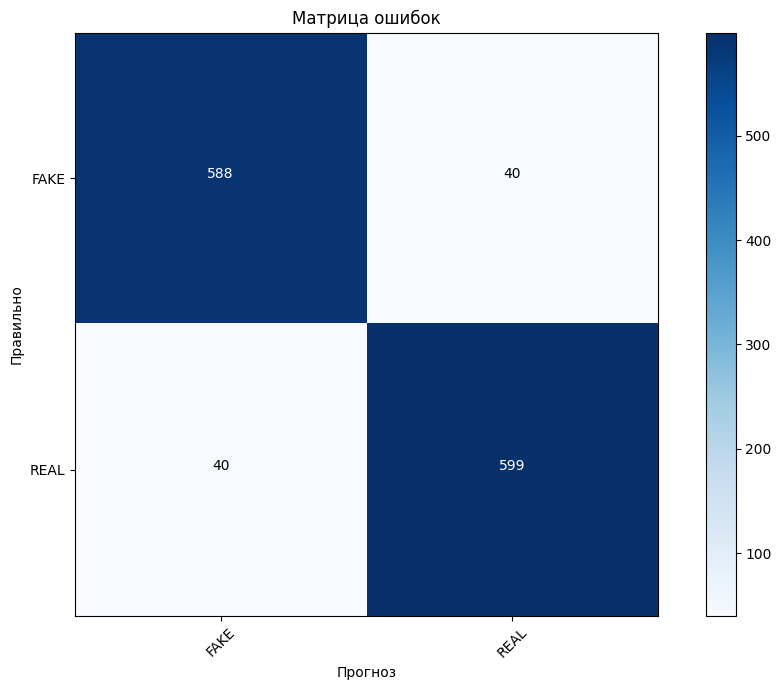

In [17]:
# Визуализация матрицы ошибок
plt.figure(figsize=(10, 7))
plot_confusion_matrix(conf_matrix, classes=['FAKE', 'REAL'], title='Матрица ошибок')
plt.show()

Модель показывает хорошие результаты, так как в основном предсказывает правильно (по диагонали). По матрице можно видеть, что модель лучше предсказывает "REAL", чем "FAKE"

In [18]:
# Отчет о классификации
print(classification_report(y_test, y_pred, target_names=['FAKE', 'REAL']))

              precision    recall  f1-score   support

        FAKE       0.94      0.94      0.94       628
        REAL       0.94      0.94      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



Отчёт показывает, что модель имеет высокую точность и полноту, как для фейковых, так и для реальных новостей. F1-мера также высока, что означает, что модель хорошо сбалансирована по точности и полноте. Это говорит о том, что модель хорошо справляется с задачей классификации новостей как фейковых или реальных.

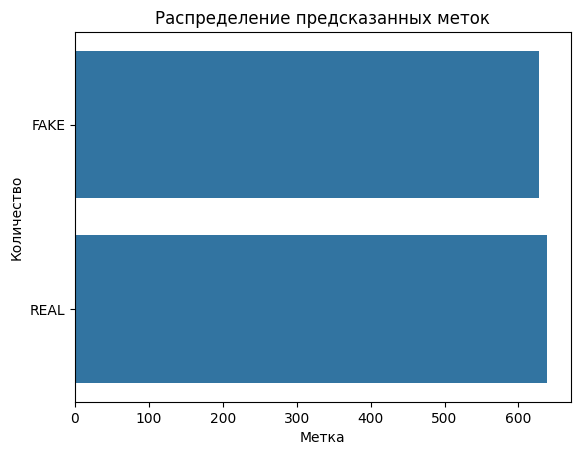

In [19]:
# Дополнительные визуализации
# Построение графика распределения предсказанных меток
sns.countplot(y_pred)
plt.title('Распределение предсказанных меток')
plt.xlabel('Метка')
plt.ylabel('Количество')
plt.show()

Можно сделать вывод, что предсказанное количество реальных и фейковых меток примерно одинаково.